**Fraud Detection**

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [101]:
# version of libraries --> useful while deployment
print("Numpy : ", np.__version__)
print("Pandas : ", pd.__version__)
print("Sklearn : ", sklearn.__version__)

Numpy :  1.26.4
Pandas :  2.1.4
Sklearn :  1.3.2


In [102]:
# loading the data
data = pd.read_csv("/content/Fraud.csv")

In [104]:
data.sample(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3574559,261,CASH_IN,47640.08,C1419226802,3269609.93,3317250.01,C2024063854,597286.19,549646.11,0,0
21246,8,CASH_IN,365114.35,C694208166,1716130.77,2081245.11,C1945802665,1455669.36,1471945.15,0,0
5131797,356,PAYMENT,20772.11,C665628188,5062.00,0.00,M917301284,0.00,0.00,0,0
5256821,372,CASH_OUT,159977.63,C775474599,101984.00,0.00,C437065251,0.00,159977.63,0,0
152487,12,PAYMENT,7022.00,C49013249,0.00,0.00,M1553123124,0.00,0.00,0,0


In [105]:
# columns/features in dataset
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [106]:
# shape of dataset
data.shape

(6362620, 11)

In [107]:
# non-null values and datatypes of columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [108]:
# changing the datatype of isFraud and isFlaggedFraud to int64
data['isFraud'] = data['isFraud'].fillna(-1).astype('int64')
data['isFlaggedFraud'] = data['isFlaggedFraud'].fillna(-1).astype('int64')

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [112]:
# statistical description of numerical columns
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [111]:
# statistical description of categorical columns
data.describe(include="object")

,type,nameOrig,nameDest
count,6362620,6362620,6362620
unique,5,6353307,2722362
top,CASH_OUT,C1902386530,C1286084959
freq,2237500,3,113


In [113]:
# checking the missing values
data.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [114]:
# Cleaning the dataset --> checking for each row
data['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [115]:
data['type'].value_counts()

,count
type,
CASH_OUT,2237500
PAYMENT,2151495
CASH_IN,1399284
TRANSFER,532909
DEBIT,41432


In [116]:
# dropping the nan values
data.dropna()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [117]:
# encoding the categorical and outcome comlumn
# pd.get_dummies(data['type'], drop_first=True)
data['type'] = data['type'].map({'CASH_OUT':1, 'PAYMENT':2, 'CASH_IN':3, 'TRANSFER':4, 'DEBIT':5})
data['isFraud'] = data['isFraud'].map({0:'No Fraud', 1:'Fraud'})
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,No Fraud,0
1,1,2,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,No Fraud,0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,Fraud,0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,Fraud,0
4,1,2,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,No Fraud,0


In [118]:
data.groupby(['type','isFraud']).count()

step   amount  nameOrig  oldbalanceOrg  newbalanceOrig  \
type isFraud                                                               
1    Fraud        4116     4116      4116           4116            4116   
     No Fraud  2233384  2233384   2233384        2233384         2233384   
2    No Fraud  2151495  2151495   2151495        2151495         2151495   
3    No Fraud  1399284  1399284   1399284        1399284         1399284   
4    Fraud        4097     4097      4097           4097            4097   
     No Fraud   528812   528812    528812         528812          528812   
5    No Fraud    41432    41432     41432          41432           41432   

               nameDest  oldbalanceDest  newbalanceDest  isFlaggedFraud  
type isFraud                                                             
1    Fraud         4116            4116            4116            4116  
     No Fraud   2233384         2233384         2233384         2233384  
2    No Fraud   2151495         2151495         2151495         2151495  
3    No Fraud   1399284         1399284         1399284         1399284  
4    Fraud         4097            4097            4097            4097  
     No Fraud    528812          528812          528812          528812  
5    No Fraud     41432           41432           41432           41432

Data Visualisation

In [119]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [120]:
# value distribution of isFraud
data['isFraud'].value_counts()

,count
isFraud,
No Fraud,6354407
Fraud,8213


<Axes: ylabel='count'>

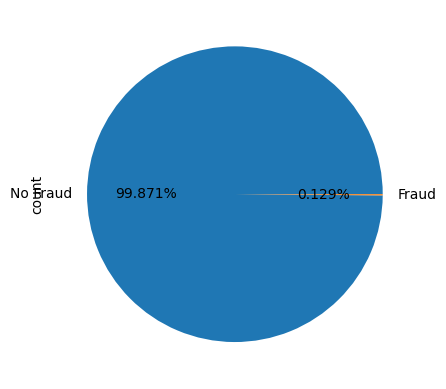

In [121]:
data['isFraud'].value_counts().plot(kind='pie', autopct='%.03f%%')

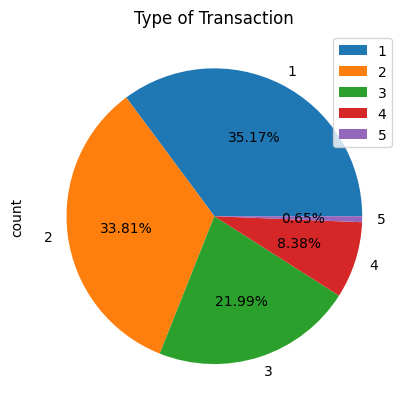

In [122]:
data['type'].value_counts().plot(kind='pie', autopct='%.2f%%')
plt.title('Type of Transaction')
plt.legend(loc="best")
plt.show()

In [123]:
# selecting the columns of numerical type --> correlation between the columns
numeric_columns = data.select_dtypes(include=['int', 'float']).columns
numeric_data = data[numeric_columns]

# pearson corrleation matrix of the numerical data
correlation = numeric_data.corr()

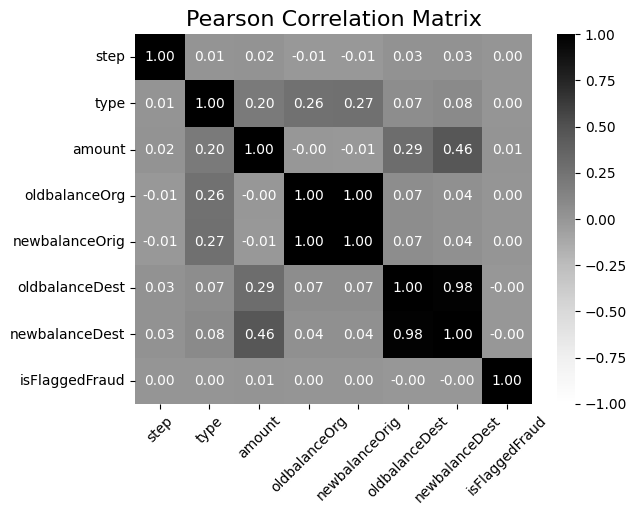

In [124]:
sns.heatmap(correlation,vmin = -1, vmax = 1,cmap = "Greys",annot = True, fmt = '.2f')
plt.title('Pearson Correlation Matrix', fontsize=16)
plt.xticks(rotation = 45)
plt.show()

Selecting the features
As the nameDest and nameOrig are the unique names and also didn't much correlated


In [126]:
# feature selection
X = data.drop(['isFraud', 'nameDest', 'nameOrig', 'step','isFlaggedFraud'], axis=1)
y = data['isFraud']

In [129]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [155]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X.shape, X_train.shape, X_test.shape)

(6362620, 6) (5090096, 6) (1272524, 6)


Logistics Regression

In [132]:
# using Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

We need False Negative(FN) rate to be minimum
as any prediction marked as Negative(No Fraud) but actually a positive(Fraud)

In [142]:
predict = model.predict(X_test)
print("Accuracy Score using Logistic Regression : ", accuracy_score(y_test, predict))
print(confusion_matrix(y_test, predict))

Accuracy Score using Logistic Regression :  0.9991599372585507
[[    643     977]
 [     92 1270812]]


Decision Tree Classifier

In [145]:
model2 = DecisionTreeClassifier(max_depth = 20)
model2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20)

In [146]:
predict = model2.predict(X_test)
print("Accuracy Score using Decision Tree Classifier : ", accuracy_score(y_test, predict))
print(confusion_matrix(y_test, predict))
# good classifier --> low false negative number (255)
# and also the false positive (132) reduced in the Decision tree classifier

Accuracy Score using Decision Tree Classifier :  0.9996958799991199
[[   1365     255]
 [    132 1270772]]
